<a href="https://colab.research.google.com/github/kb107/CNN-Architectures/blob/main/AlexNet/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [96]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [126]:
X_valid = X_train[:5000]
y_valid = y_train[:5000]
X_train = X_train[5000:]
y_train = y_train[5000:]

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

In [127]:
train_tf = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_tf = tf.data.Dataset.from_tensor_slices((X_test, y_test))
valid_tf = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))

In [99]:
classes = ['airplane', 'automobile', 'bird', 'cat', 
           'deer', 'dog', 'frog', 'horse', 'ship', 
           'truck']

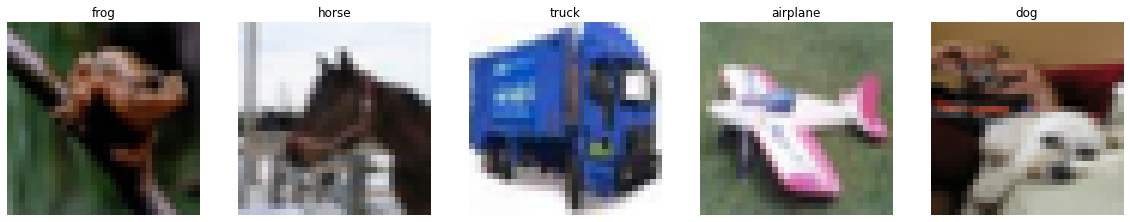

In [100]:
plt.figure(figsize=(20,20))
for i, (img, label) in enumerate(train_tf.take(5)):
  ax = plt.subplot(1,5,i+1)
  plt.imshow(img)
  plt.title(classes[label.numpy().argmax()])
  plt.axis('off')

In [101]:
def pre_process(img, label):
  img = tf.image.per_image_standardization(img)
  img = tf.image.resize(img, (227, 227))
  return img, label

In [128]:
train_tf_size = tf.data.experimental.cardinality(train_tf).numpy()
test_tf_size = tf.data.experimental.cardinality(test_tf).numpy()
valid_tf_size = tf.data.experimental.cardinality(valid_tf).numpy()
print("Training data size:", train_tf_size)
print("Test data size:", test_tf_size)
print("Validation data size:", valid_tf_size)

Training data size: 40000
Test data size: 10000
Validation data size: 5000


In [129]:
train_tf = (train_tf.map(pre_process)
                    .shuffle(buffer_size=train_tf_size)
                    .batch(batch_size=32, drop_remainder=True))

test_tf = (test_tf.map(pre_process)
                    .shuffle(buffer_size=test_tf_size)
                    .batch(batch_size=32, drop_remainder=True))

valid_tf = (valid_tf.map(pre_process)
                    .shuffle(buffer_size=valid_tf_size)
                    .batch(batch_size=32, drop_remainder=True))

In [104]:
train_tf

<BatchDataset shapes: ((32, 227, 227, 3), (32, 10)), types: (tf.float32, tf.float32)>

In [105]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Running on TPU  ['10.59.38.250:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.59.38.250:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.59.38.250:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dense, Flatten, Dropout

In [107]:
with tpu_strategy.scope():

  model = Sequential()

  model.add(Conv2D(filters=96, kernel_size=11,
                   strides=4, activation='relu', input_shape=(227, 227, 3)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=3, strides=2))

  
  model.add(Conv2D(filters=256, kernel_size=5,
                   strides=1, padding='same', 
                   activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=3, strides=2))

  
  model.add(Conv2D(filters=384, kernel_size=3,
                   strides=1, padding='same', 
                   activation='relu'))
  model.add(BatchNormalization())

  
  model.add(Conv2D(filters=384, kernel_size=3,
                   strides=1, padding='same', 
                   activation='relu'))
  model.add(BatchNormalization())


  model.add(Conv2D(filters=256, kernel_size=3,
                   strides=1, padding='same', 
                   activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=3, strides=2))

  
  model.add(Flatten())
  model.add(Dense(units=4096, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(units=4096, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(units=10, activation='softmax'))


  model.compile(optimizer='adam', loss='categorical_crossentropy', 
                metrics=['accuracy'])

In [108]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_15 (Batc (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_16 (Batc (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 384)      

In [109]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, 
                           restore_best_weights=True)

In [111]:
model.fit(train_tf, epochs=500, validation_data=valid_tf,
          callbacks=[early_stop])

Epoch 1/500
1406/1406 [==============================] - 51s 35ms/step - loss: 1.9198 - accuracy: 0.3222 - val_loss: 1.8949 - val_accuracy: 0.4303
Epoch 2/500
1406/1406 [==============================] - 47s 32ms/step - loss: 1.7361 - accuracy: 0.3911 - val_loss: 1.4688 - val_accuracy: 0.5042
Epoch 3/500
1406/1406 [==============================] - 47s 32ms/step - loss: 1.4751 - accuracy: 0.4899 - val_loss: 1.1906 - val_accuracy: 0.5867
Epoch 4/500
1406/1406 [==============================] - 47s 32ms/step - loss: 1.2448 - accuracy: 0.5777 - val_loss: 1.1177 - val_accuracy: 0.6262
Epoch 5/500
1406/1406 [==============================] - 47s 32ms/step - loss: 1.0694 - accuracy: 0.6431 - val_loss: 0.9121 - val_accuracy: 0.7037
Epoch 6/500
1406/1406 [==============================] - 47s 32ms/step - loss: 0.9352 - accuracy: 0.6865 - val_loss: 0.9001 - val_accuracy: 0.7256
Epoch 7/500
1406/1406 [==============================] - 47s 32ms/step - loss: 0.8344 - accuracy: 0.7207 - val_loss: 0

In [112]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.919767,0.322213,1.894896,0.430288
1,1.736083,0.391136,1.468764,0.504207
2,1.475116,0.489865,1.190608,0.586739
3,1.244836,0.577747,1.117691,0.626202
4,1.069380,0.643092,0.912096,0.703726


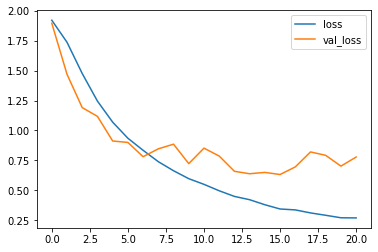

In [113]:
losses[['loss', 'val_loss']].plot()

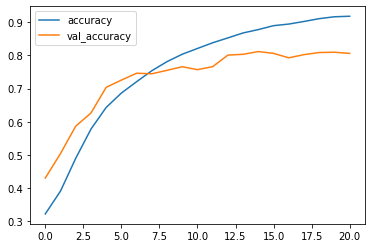

In [114]:
losses[['accuracy', 'val_accuracy']].plot()

In [130]:
print(model.evaluate(test_tf))

312/312 [==============================] - 5s 12ms/step - loss: 0.7039 - accuracy: 0.7912
[0.7038571238517761, 0.7911658883094788]
